In [1]:
import numpy as np
from descwl_shear_sims.sim import make_sim, get_se_dim  # for making a simulation realization
from descwl_shear_sims.psfs import make_fixed_psf
from descwl_shear_sims.galaxies import FixedGalaxyCatalog  # one of the galaxy catalog classes
import galsim

In [2]:
class GaussianGalaxyCatalog(FixedGalaxyCatalog):
    def _get_galaxy(self, flux):
        """
        get a galaxy object.  Use bulge+disk instead
        of Exponential used in the FixedGalaxyCatalog

        Parameters
        ----------
        flux: float
            Flux of object

        Returns
        --------
        galsim.GSObject
        """

        gal_gauss = galsim.Gaussian(
            half_light_radius=self.hlr,
            flux=flux,
        )

        return gal_gauss

In [3]:
seed = 8312
rng = np.random.RandomState(seed)

In [4]:
ntrial = 2
coadd_dim = 351
buff = 50

In [5]:
seed = 8312
rng = np.random.RandomState(seed)

ntrial = 1
coadd_dim = 351
buff = 50

for trial in range(ntrial):
    print('trial: %d/%d' % (trial+1, ntrial))

    # galaxy catalog; you can make your own
    galaxy_catalog = GaussianGalaxyCatalog(
        rng=rng,
        coadd_dim=coadd_dim,
        buff=buff,
        layout='grid',
        mag=24,
        hlr=1.0,
        morph="gauss",
    )

    # make a constant gaussian psf.  Any galsim object will do
    psf = make_fixed_psf(psf_type='gauss')

    # generate some simulation data, with a particular shear

    sim_data = make_sim(
        rng=rng,
        galaxy_catalog=galaxy_catalog,
        coadd_dim=coadd_dim,
        g1=0.01,
        g2=0.00,
        psf=psf,
        noise_factor=1e-5
    )

    # the sim_data has keys
    #    band_data: a dict keyed by band with a list of single-epoch
    #      observations objects, one for each epoch.  The class is
    #      SEObs, defined in descwl_shear_sims.se_obs.py and has attributes
    #      for the image, weight map, wcs, noise image, bmask and a psf
    #      image generating method get_psf(x, y).  The images are galsim
    #      Image objects.
    #    coadd_wcs:  the wcs for the coadd
    #    psf_dims:  dimensions of the psf
    #    coadd_dims: dimensions of the coadd
    print('bands:', sim_data['band_data'].keys())
    print('nepocs i:', len(sim_data['band_data']['i']))
    print('image shape:', sim_data['band_data']['i'][0].image.array.shape)
    print('psf shape:', sim_data['psf_dims'])
    print('coadd shape:', sim_data['coadd_dims'])

trial: 1/1
bands: dict_keys(['i'])
nepocs i: 1
image shape: (361, 361)
psf shape: (51, 51)
coadd shape: (351, 351)


In [6]:
def show_obs_mpl(obs):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(7,7))
    plt.imshow(obs.image.array, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

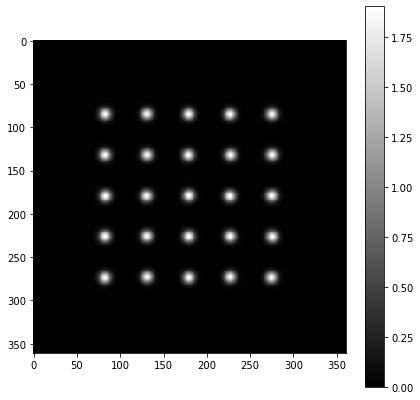

In [7]:
show_obs_mpl(sim_data['band_data']['i'][0])